In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
from scipy import io
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("white")

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
first_train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
first_train_data_generator = first_train_datagen.flow_from_directory('dane/only_tryp_data_train',
                                            target_size=(200, 200),
                                            batch_size=32,
                                            class_mode='binary',
                                            classes=['non-trypophobic','trypophobic'])
first_test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
first_test_data_generator = first_test_datagen.flow_from_directory('dane/only_tryp/data_valid',
                                            target_size=(200, 200),
                                            batch_size=32,
                                            class_mode='binary',
                                            classes=['non-trypophobic','trypophobic'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_data_generator = train_datagen.flow_from_directory('dane/data_train',
                                            target_size=(200, 200),
                                            batch_size=32,
                                            class_mode='binary',
                                            classes=['non-trypophobic','trypophobic'])

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = test_datagen.flow_from_directory('dane/data_valid',
                                            target_size=(200, 200),
                                            batch_size=32,
                                            class_mode='binary',
                                            classes=['non-trypophobic','trypophobic'])



Found 1560 images belonging to 2 classes.
Found 318 images belonging to 2 classes.
Found 1560 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


(200, 200, 3)


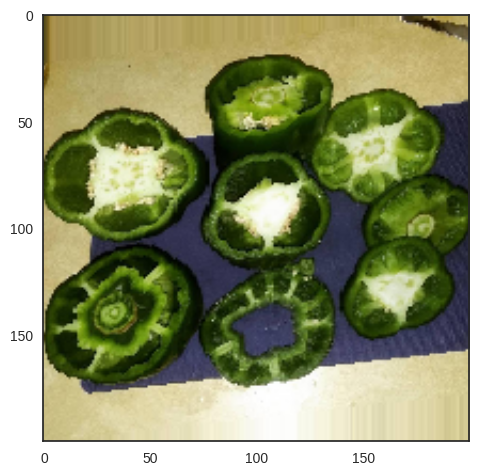

In [30]:
print(train_data_generator)
for x in train_data_generator:
    print(np.shape(x[0][0]))
    img = x[0][0]
    break;
image = plt.imshow(img)
plt.show()

In [24]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='valid', activation='relu'))
#odel.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalMaxPooling2D())
#model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

      OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

          Input   #####   (200, 200, 3)
  Convolution2D    \|/  -------------------       896     0.8%
           relu   #####   (198, 198, 32)
   MaxPooling2D   YYYYY -------------------         0     0.0%
                  #####   (99, 99, 32)
  Convolution2D    \|/  -------------------     18496    16.8%
           relu   #####   (97, 97, 64)
   MaxPooling2D   YYYYY -------------------         0     0.0%
                  #####   (48, 48, 64)
  Convolution2D    \|/  -------------------     36928    33.5%
           relu   #####   (46, 46, 64)
   MaxPooling2D   YYYYY -------------------         0     0.0%
                  #####   (23, 23, 64)
  Convolution2D    \|/  -------------------     36928    33.5%
           relu   #####   (21, 21, 64)
GlobalMaxPooling2D   ????? -------------------         0     0.0%
                  #####   (64,)
        Dropout    | || -------------------         0     0.0%
              

In [26]:
# checkpoint
filepath="net3_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [31]:
history1 = model.fit_generator(
        first_train_data_generator,
        samples_per_epoch=2000,
        nb_epoch=5,
        validation_data=first_test_data_generator,
        nb_val_samples=800,
        callbacks=callbacks_list)

Epoch 1/5
1976/2000 [============================>.] - ETA: 1s - loss: 0.3762 - acc: 0.8406  

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:1527: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_acc improved from 0.84058 to 0.84541, saving model to net3_weights-improvement-00-0.85.hdf5
2008/2000 [==============================] - 159s - loss: 0.3768 - acc: 0.8406 - val_loss: 0.3751 - val_acc: 0.8454
Epoch 2/5
2008/2000 [==============================] - 146s - loss: 0.3670 - acc: 0.8436 - val_loss: 0.4116 - val_acc: 0.8366
Epoch 3/5
2000/2000 [==============================] - 142s - loss: 0.3869 - acc: 0.8430 - val_loss: 0.3727 - val_acc: 0.8414
Epoch 4/5
2008/2000 [==============================] - 164s - loss: 0.3749 - acc: 0.8416 - val_loss: 0.3750 - val_acc: 0.8394
Epoch 5/5
2008/2000 [==============================] - 148s - loss: 0.3827 - acc: 0.8317 - val_loss: 0.3852 - val_acc: 0.8402


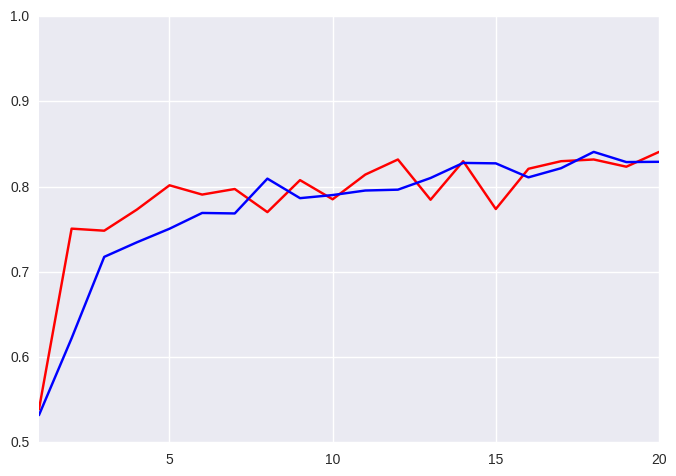

In [29]:
sns.set_style("darkgrid")
plt.plot(range(1,21),history1.history['val_acc'],"r",range(1,21),history1.history['acc'],"b")
plt.axis([1,20,0.5,1])
plt.show()

In [30]:
model.save('model5.only_cut.h5')

In [39]:
line = plt.gca().get_lines()
xd = line[0].get_xdata()
yd = line.get_ydata()
print(xd)

IndexError: list index out of range

In [41]:
import os
import re
from scipy import ndimage, misc

images = []
for root, dirnames, filenames in os.walk("dane/only_tryp/data_train/trypophobic"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (200, 200))
            images.append(image_resized)
images = np.array(images)

In [45]:
images = np.transpose(images, (0, 2, 3, 1))

In [48]:
predicted = model.predict(images)

In [83]:
x = 0
strasznie_zle = []
for i,num in enumerate(predicted):
#   print(num)
    if num <= 0.00:
        x += 1
        strasznie_zle.append(i)
print(x)

202


In [70]:
print(strasznie_zle)

[11, 191, 193, 261, 286, 301, 331, 421, 446, 537, 663, 695]


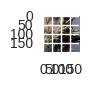

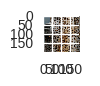

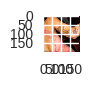

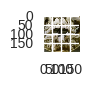

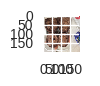

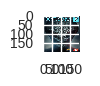

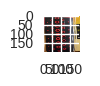

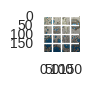

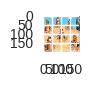

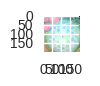

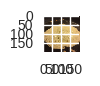

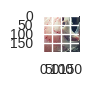

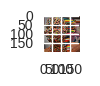

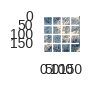

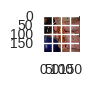

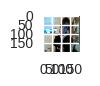

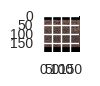

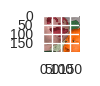

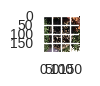

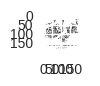

In [87]:
fig = plt()
for l,i in enumerate(strasznie_zle):
    if l < 20:
        plt.subplot(10,2,l+1)
        plt.imshow(images[i])
        plt.show()

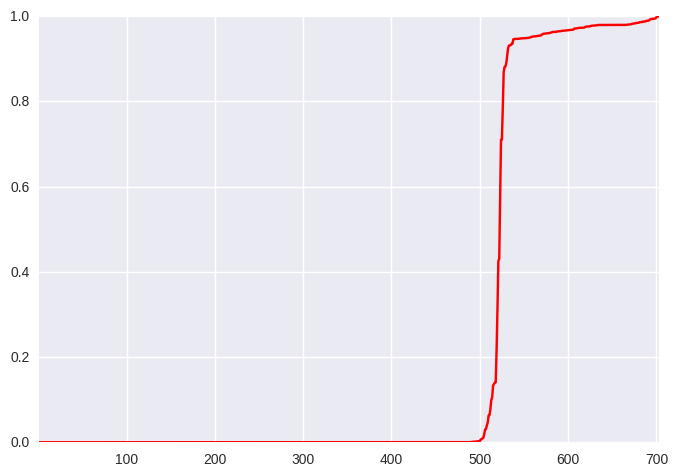

In [99]:
sortedIm = sorted(predicted)
sns.set_style("darkgrid")
plt.plot(range(1,len(sortedIm)+1),sortedIm,"r")
plt.axis([1,len(predicted),0,1])
plt.show()